In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
import os

In [ ]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding="latin1")

print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
# Display initial dataset information
df.info()
print("\nFirst 5 rows of dataset:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB

First 5 rows of dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)

In [ ]:
# Drop unnecessary columns
df.drop(columns=["Name", "Year"], inplace=True)

In [ ]:
print(data.isnull().sum())


Name           0
Year           0
Genre       1874
Rating         0
Votes          0
Director     525
Actor 1     1593
Actor 2     2341
Actor 3     3081
dtype: int64


In [ ]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Name         0.000000
Year         0.000000
Genre       16.887447
Rating       0.000000
Votes        0.000000
Director     4.731008
Actor 1     14.355231
Actor 2     21.095792
Actor 3     27.764261
dtype: float64


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

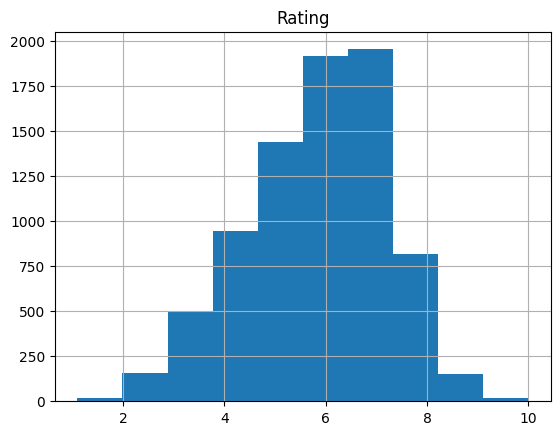

In [ ]:
df.hist(column=['Rating'])

In [ ]:
# Convert categorical variables to numerical using Label Encoding
encoder = LabelEncoder()
df["Genre"] = encoder.fit_transform(df["Genre"])
df["Director"] = encoder.fit_transform(df["Director"])
df["Actor 1"] = encoder.fit_transform(df["Actor 1"])
df["Actor 2"] = encoder.fit_transform(df["Actor 2"])
df["Actor 3"] = encoder.fit_transform(df["Actor 3"])

In [ ]:
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index([], dtype='object')


In [ ]:
data['Year'] = data['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'].fillna(0, inplace=True)
data['Year'] = data['Year'].astype(int)

<ipython-input-97-74b9bf7b529c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year'].fillna(0, inplace=True)


In [ ]:
data['Rating'].fillna(0, inplace=True)
data['Votes'] = data['Votes'].astype(str).str.replace(',', '', regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'].fillna(0, inplace=True)

<ipython-input-98-dbbc9f6d8b85>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(0, inplace=True)
<ipython-input-98-dbbc9f6d8b85>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [ ]:
numerical_columns = ['Year', 'Votes', 'Rating']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

# Check for remaining NaNs in numerical columns
print("Remaining NaNs in numerical columns:")
print(data[numerical_columns].isnull().sum())

Remaining NaNs in numerical columns:
Year      0
Votes     0
Rating    0
dtype: int64


<ipython-input-99-2a338c2c3d44>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [ ]:
q1 = np.percentile(data['Votes'], 25)
q3 = np.percentile(data['Votes'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Votes'] >= lower_bound) & (data['Votes'] <= upper_bound)]

In [ ]:
# Define features and target
X = df.drop(columns=["Rating"])
# Convert 'Votes' to numeric, removing commas, currency symbols, and magnitude indicators
X['Votes'] = X['Votes'].str.replace(',', '', regex=True)  # Remove commas
X['Votes'] = X['Votes'].str.replace(r'[$,M]', '', regex=True)  # Remove $, M
X['Votes'] = pd.to_numeric(X['Votes'], errors='coerce').fillna(0).astype(float)  # Convert to float, handle errors, fill NaNs with 0

# Extract numerical duration from 'Duration' column
X['Duration'] = X['Duration'].str.extract('(\d+)').astype(float)  # Extract digits and convert to float
X['Duration'].fillna(X['Duration'].median(), inplace=True)  # Fill NaNs with median duration

y = df["Rating"].fillna(df["Rating"].median())

<ipython-input-101-cca5ae9f0e29>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Duration'].fillna(X['Duration'].median(), inplace=True)  # Fill NaNs with median duration


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:

# Print evaluation metrics
print("\nModel Evaluation:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation:
MAE: 0.4817
MSE: 0.7667
RMSE: 0.8756
R² Score: 0.2116


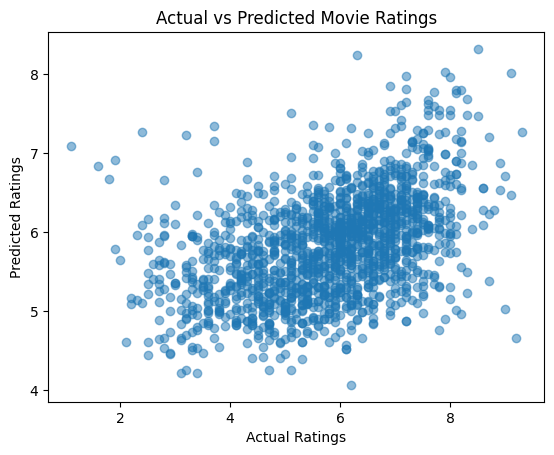

In [ ]:

# Plot actual vs predicted ratings
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()